In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from numpy import set_printoptions
np.set_printoptions(suppress=True)

In [3]:
df=pd.read_csv('bank_labeled.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,1,999,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,1,999,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,1,999,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,1,999,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,1,999,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,10,3,999,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,10,2,999,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,10,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,10,4,999,0,3,0


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,1,999,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,1,999,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,1,999,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,1,999,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,1,999,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int64
 15  y          45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [6]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

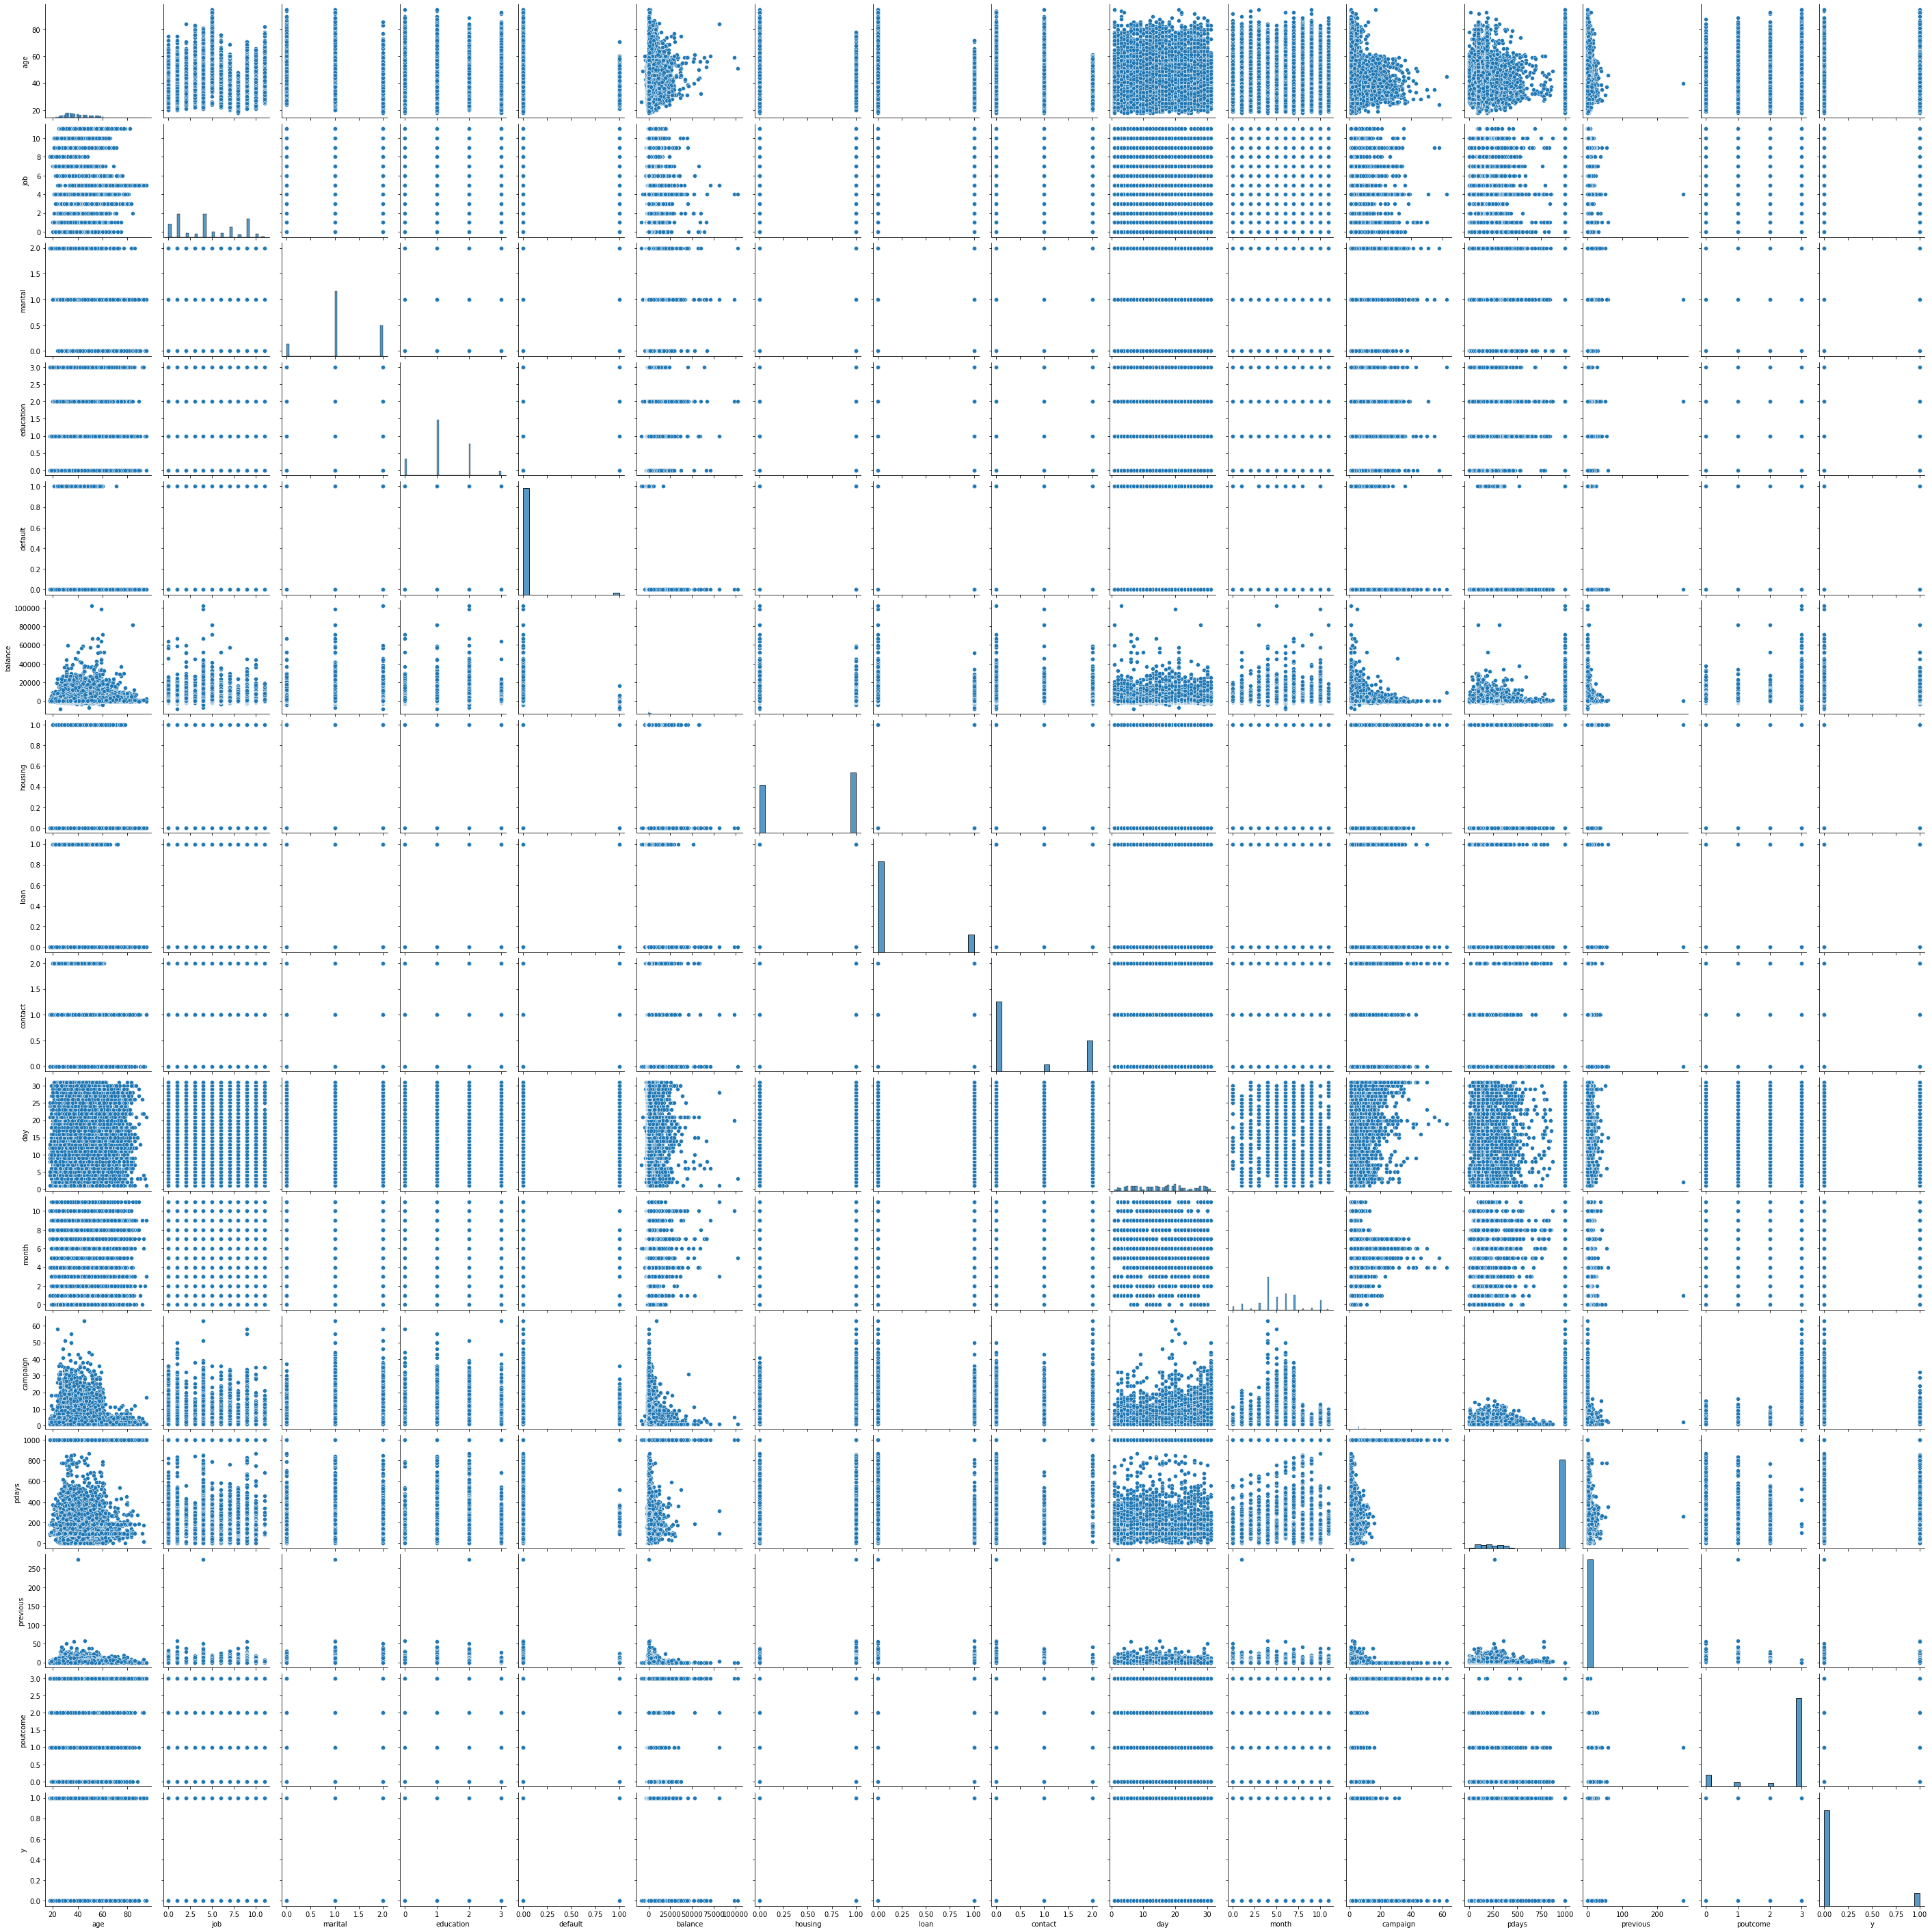

In [7]:
sns.pairplot(df)

In [8]:
df.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

In [9]:
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [10]:
39922/5289

7.548118737001324

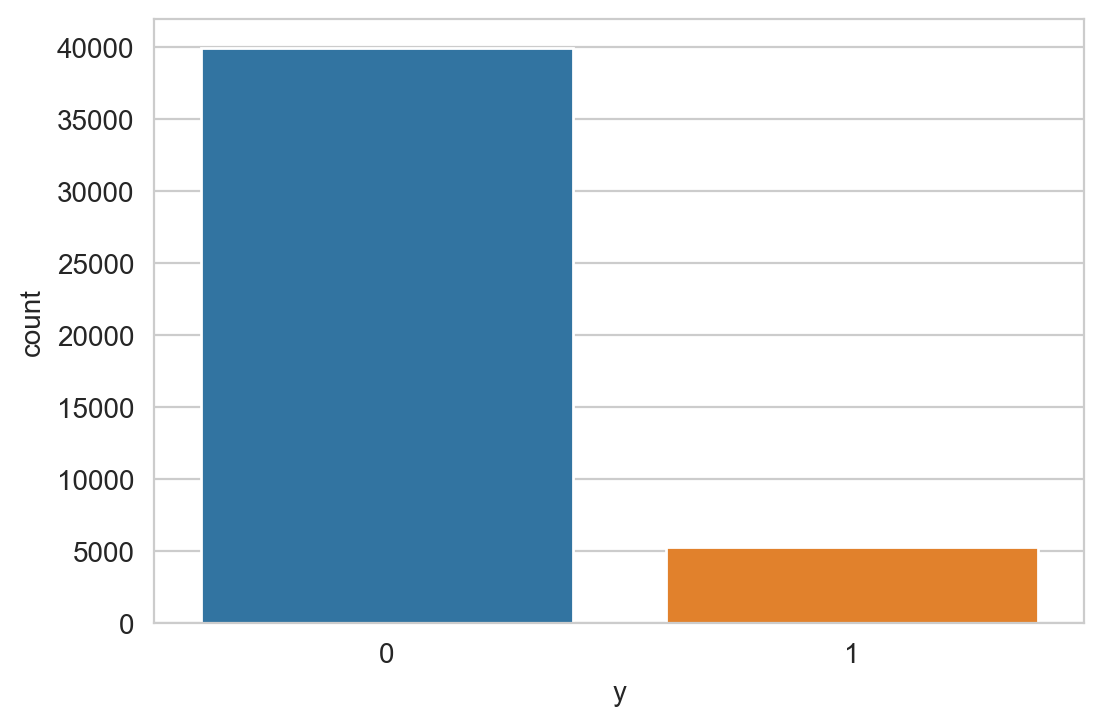

In [11]:
plt.figure(dpi=200)
sns.set_style('whitegrid')
sns.countplot(x='y',data=df);

In [12]:
# plt.figure(dpi=100)
# sns.set_style('whitegrid')
# sns.countplot(x='y',hue='age',data=df);

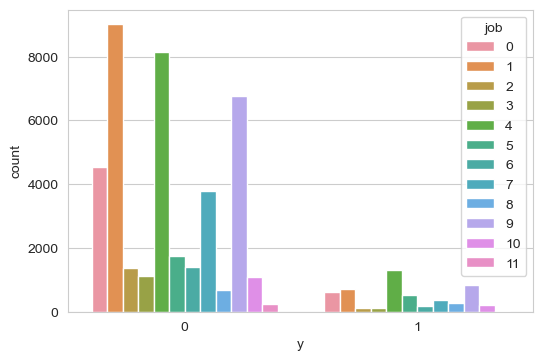

In [13]:
plt.figure(dpi=100)
sns.set_style('whitegrid')
sns.countplot(x='y',hue='job',data=df);

In [14]:
df.groupby(['default'])['y'].value_counts()

default  y
0        0    39159
         1     5237
1        0      763
         1       52
Name: y, dtype: int64

In [15]:
print(df.pdays.value_counts().to_dict())

{999: 36954, 182: 167, 92: 147, 91: 126, 183: 126, 181: 117, 370: 99, 184: 85, 364: 77, 95: 74, 350: 73, 94: 72, 175: 71, 185: 68, 93: 65, 343: 65, 188: 64, 186: 60, 189: 60, 174: 57, 349: 57, 96: 57, 363: 55, 90: 54, 97: 54, 196: 51, 365: 51, 368: 49, 357: 49, 98: 49, 342: 49, 345: 48, 351: 48, 178: 47, 367: 47, 347: 47, 190: 46, 195: 45, 356: 45, 104: 45, 99: 45, 180: 45, 172: 44, 371: 44, 344: 44, 150: 43, 170: 43, 87: 43, 179: 43, 187: 43, 169: 42, 176: 42, 105: 42, 167: 42, 352: 40, 355: 40, 360: 38, 168: 37, 2: 37, 272: 37, 336: 36, 359: 36, 358: 35, 346: 35, 265: 35, 102: 35, 173: 34, 171: 34, 361: 33, 252: 33, 330: 33, 369: 33, 113: 33, 177: 32, 85: 32, 264: 31, 119: 31, 301: 31, 259: 31, 287: 31, 332: 31, 192: 31, 270: 31, 337: 30, 100: 30, 366: 30, 89: 30, 266: 30, 101: 30, 258: 30, 326: 30, 362: 29, 111: 29, 322: 29, 271: 29, 274: 29, 88: 29, 148: 28, 191: 28, 340: 28, 110: 28, 300: 27, 84: 27, 86: 27, 197: 27, 335: 27, 267: 27, 273: 27, 154: 27, 339: 26, 253: 26, 348: 26, 3

In [16]:
print(df.previous.value_counts().to_dict())

{0: 36954, 1: 2772, 2: 2106, 3: 1142, 4: 714, 5: 459, 6: 277, 7: 205, 8: 129, 9: 92, 10: 67, 11: 65, 12: 44, 13: 38, 15: 20, 14: 19, 17: 15, 16: 13, 19: 11, 20: 8, 23: 8, 18: 6, 22: 6, 24: 5, 27: 5, 21: 4, 29: 4, 25: 4, 30: 3, 38: 2, 37: 2, 26: 2, 28: 2, 51: 1, 275: 1, 58: 1, 32: 1, 40: 1, 55: 1, 35: 1, 41: 1}


In [17]:
#select numeric features first
X=df.drop(columns='y')
X=df.select_dtypes(exclude=['object'])
y=df.y

In [18]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


# KNN model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8751520513104059


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7952
           1       0.43      0.12      0.18      1091

    accuracy                           0.88      9043
   macro avg       0.66      0.55      0.56      9043
weighted avg       0.83      0.88      0.84      9043



In [32]:
# #search for an optimal k
# from sklearn.model_selection import cross_val_score
# k_range = list(range(1, 101))
# k_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
# print(k_scores)

In [33]:
# n=np.array(k_scores)
# print(f'Optimal value of k is : {np.argmax(n)+1}')
# print(f'Accuracy score is: {np.max(n)}')

In [34]:
# # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# # define the parameter values that should be searched
# k_range = list(range(1, 101))
# print(k_range)

# # create a parameter grid: map the parameter names to the values that should be searched
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

# # instantiate the grid
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# # fit the grid with data
# grid.fit(X_train, y_train)

In [37]:
# view the complete results
#grid.cv_results_

In [38]:
# # examine the best model
# print("Best params: ", grid.best_params_)
# print("Best estimator: ", grid.best_estimator_)
# print("Best score: ", grid.best_score_)

In [39]:
# y_predict=grid.predict(X_test)
# y_predict

In [40]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_predict)

In [41]:
k_range = list(range(1, 21))
print(k_range)

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

y_predict=grid.predict(X_test)

confusion_matrix(y_test, y_predict)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best params:  {'n_neighbors': 16}
Best estimator:  KNeighborsClassifier(n_neighbors=16)
Best score:  0.8830733556631539


array([[7906,   46],
       [1047,   44]])

In [42]:
(7910+41)/(1050+42+7910+41)  #manually calculate accuracy score

0.879243613844963

In [43]:
from sklearn.metrics import precision_score, recall_score,f1_score
# using the default threshold of 0.5
print("Default threshold:") 
print(f"Precision: {precision_score(y_test, y_predict,pos_label=1)}") 
print(f"Recall: {recall_score(y_test, y_predict,pos_label=1)}") 
print(f"F1: {f1_score(y_test, y_predict,pos_label=1)}")

Default threshold:
Precision: 0.4888888888888889
Recall: 0.04032997250229148
F1: 0.07451312447078748


In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      7952
           1       0.49      0.04      0.07      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.52      0.50      9043
weighted avg       0.84      0.88      0.83      9043



# Logistic Model

In [ ]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='y')

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html


In [ ]:
#Fit a logistic regression on each of the variables individually
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

In [ ]:
#Fit a logistic regression on all of the numeric variables
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_prob_pred_test = lr_model.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

In [22]:
lr_y_pred=lr_model.predict(X_test)
print(classification_report(y_test, lr_y_pred))

NameError: name 'lr_model' is not defined

In [47]:
lr_model = LogisticRegression(C=0.1)
lr_model.fit(X_train, y_train)
y_prob_pred_test = lr_model.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.35830166995248175


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regularization

In [132]:
#Scale features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [133]:
lr_model = LogisticRegression(C=0.1)
lr_model.fit(X_tr, y_train)
y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.35261501672665624


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

In [134]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(Cs=10,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.3532115174065723
[0.00077426]


NameError: name 'Cs' is not defined

In [136]:
lr_model = LogisticRegressionCV(Cs=1,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.3589709619830818
[0.0001]


NameError: name 'Cs' is not defined

In [138]:
C_range=np.logspace(-6, 1, 50)
lr_model = LogisticRegressionCV(Cs=C_range,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.3551910341269397
[0.00026827]


In [139]:
C_range=np.logspace(-7, 1, 50)
lr_model = LogisticRegressionCV(Cs=C_range,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.35519103412705383
[0.00026827]


In [140]:
C_range=np.logspace(-8, 1, 50)
lr_model = LogisticRegressionCV(Cs=C_range,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.3553294642206642
[0.00025595]


In [141]:
C_range=[0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
lr_model = LogisticRegressionCV(Cs=C_range,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.35299543074884165
[0.001]


In [142]:
#Add penalty term

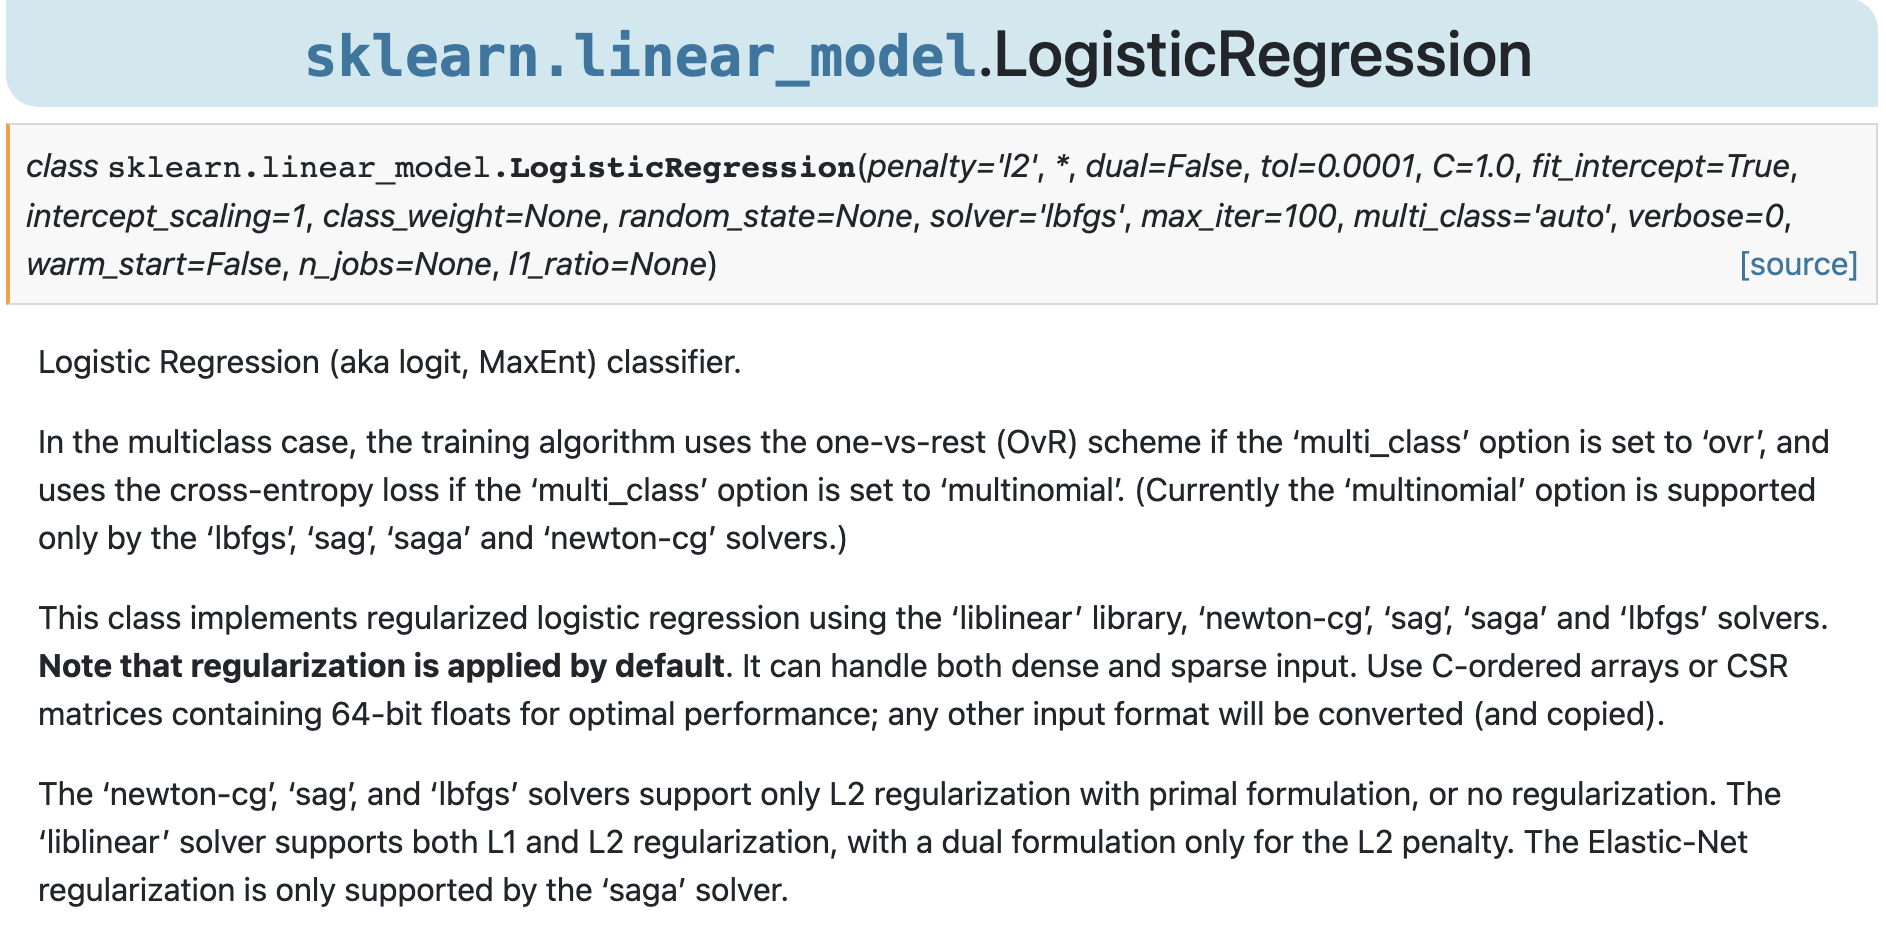

In [143]:
lr_model = LogisticRegression(C=0.0001, solver='liblinear') 
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.47189125165291823


In [144]:
solver_=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
logloss=[]
for i in solver_:
    lr_model = LogisticRegression(C=0.0001,solver=i) 
    lr_model.fit(X_tr, y_train)

    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    logloss.append(log_loss(y_test,y_prob_pred_test))

n=np.array(logloss)
print(f'smallest log loss: {np.min(n)}')
print(f'the optimal solver: {solver_[np.argmin(n)]}')  

smallest log loss: 0.35896898812531236
the optimal solver: saga


In [145]:
lr_model = LogisticRegression(C=0.0001,solver='saga') 
lr_model.fit(X_tr, y_train)

confusion_matrix(y_test, lr_model.predict(X_te))

array([[7952,    0],
       [1091,    0]])

In [146]:
#TPR (True Positive Rate)= Recall = TP / (TP+FN)
#FPR (False Positive Rate) = FP / (FP+TN)
print(f'True Positive Rate: {0/(7952+0)*100}%')
print(f'False Positive Rate: {1092/(1092+0)*100}%')

True Positive Rate: 0.0%
False Positive Rate: 100.0%


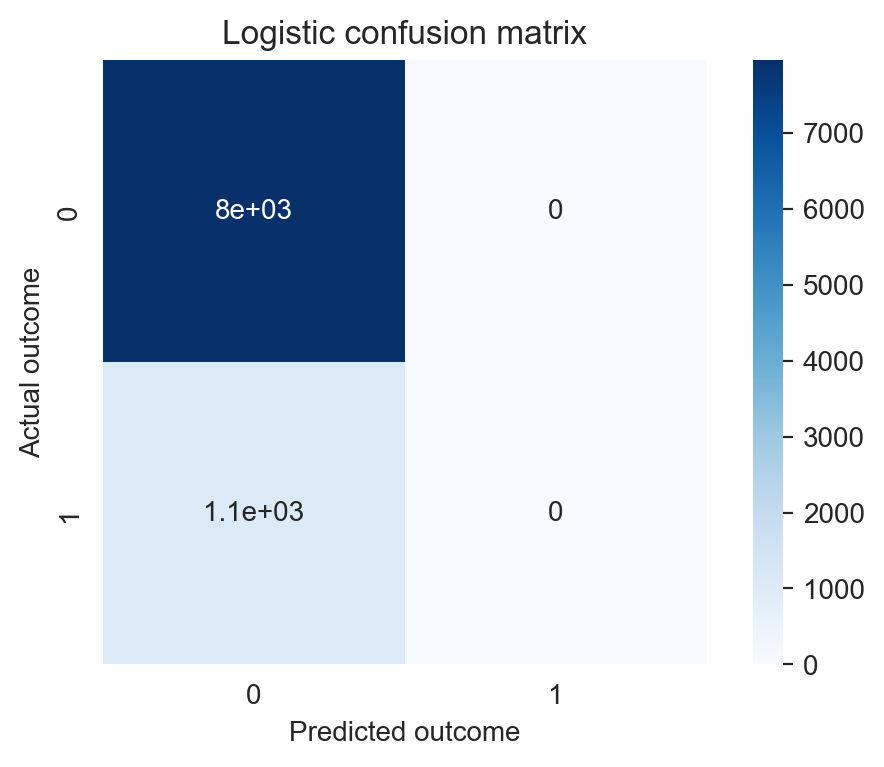

In [148]:
logreg_matrix=confusion_matrix(y_test, lr_model.predict(X_te))
plt.figure(dpi=200)
sns.heatmap(logreg_matrix, cmap=plt.cm.Blues,
annot=True, square=True)
plt.xlabel('Predicted outcome')                       
plt.ylabel('Actual outcome') 
plt.title('Logistic confusion matrix');

In [149]:
print('Regularized Logistic Regression:')
print("Default threshold:") 
print(f"Precision: {precision_score(y_test, y_predict,pos_label='yes')}") 
print(f"Recall: {recall_score(y_test, y_predict,pos_label='yes')}") 
print(f"F1: {f1_score(y_test, y_predict,pos_label='yes')}")  

Regularized Logistic Regression:
Default threshold:
Precision: 0.48314606741573035
Recall: 0.03941338221814849
F1: 0.0728813559322034


In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.88      0.99      0.94      7952
         yes       0.48      0.04      0.07      1091

    accuracy                           0.88      9043
   macro avg       0.68      0.52      0.50      9043
weighted avg       0.83      0.88      0.83      9043



In [71]:
from sklearn.metrics import precision_recall_curve
# p_curve, r_curve, t_curve= precision_recall_curve(y_test,lr_model.predict_proba(X_te)[:,1])

In [72]:
p_curve, r_curve, t_curve= precision_recall_curve(y_test,lr_model.predict_proba(X_te)[:,1],pos_label='yes')
p_curve, r_curve, t_curve

(array([0.12114146, 0.12104386, 0.12105731, ..., 0.5       , 1.        ,
        1.        ]),
 array([1.        , 0.99908341, 0.99908341, ..., 0.00091659, 0.00091659,
        0.        ]),
 array([0.07822779, 0.0786802 , 0.07872027, ..., 0.25207081, 0.31740751,
        0.44009821]))

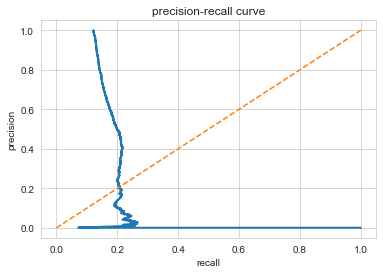

In [76]:
plt.plot(p_curve, r_curve,lw=2)
plt.plot([0,1],[0,1],ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])                  #logistic 

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve');

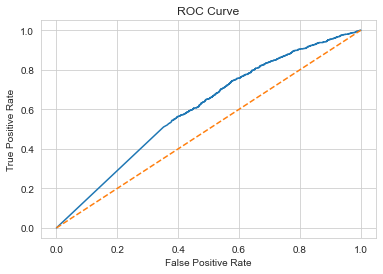

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [78]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

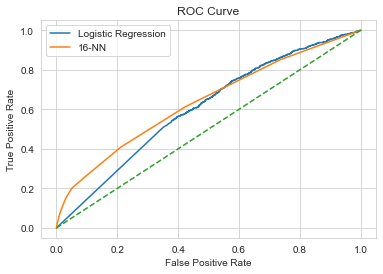

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','16-NN'])